## Tensorflow


 Familiarize yourself with TensorFlow
1. Use the UCI heart dataset to develop a simple NN classifier (one
hidden layer with 10 units) that predicts the presence of a heart
disease (field „goal“) <br>
 a. Try adam and RMSprop as optimizers
2ן Evaluate the NN classifier properly within a nested cross-validation <br>
 b. How does the model compare against your previously developed RF classifier?

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:

import numpy as np
import glob
import os 
import tensorflow as tf
tf.keras.backend.clear_session()

In [4]:
def preprocess(file):  
    data = [ x.split(',') for x in file.split('\n')[:-1]] # first split by the escape and then comma
    data = pd.DataFrame(data)
    data = data.replace('?', np.nan)
    data.dropna(inplace = True)
    return data

def load():
    columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']
    df = pd.DataFrame()
    path = "../UCI_data"
    for file in glob.glob(os.path.join(path, 'processed.*.data')):
        if 'processed' in file: 
            print (file)
            f = open(file).read()
            data = preprocess(f)
            df = df.append(data)
    df.columns = columns
    for i in range(len(df.columns)): 
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i])
    return df
    

In [5]:
df = load()

../UCI_data/processed.cleveland.data
../UCI_data/processed.switzerland.data
../UCI_data/processed.hungarian.data
../UCI_data/processed.va.data


In [6]:
df.head()
df.index = range(len(df))

In [7]:
len(df)

299

In [8]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [9]:
df['goal']= df['num'] >=1
df.goal = df.goal.astype(int)

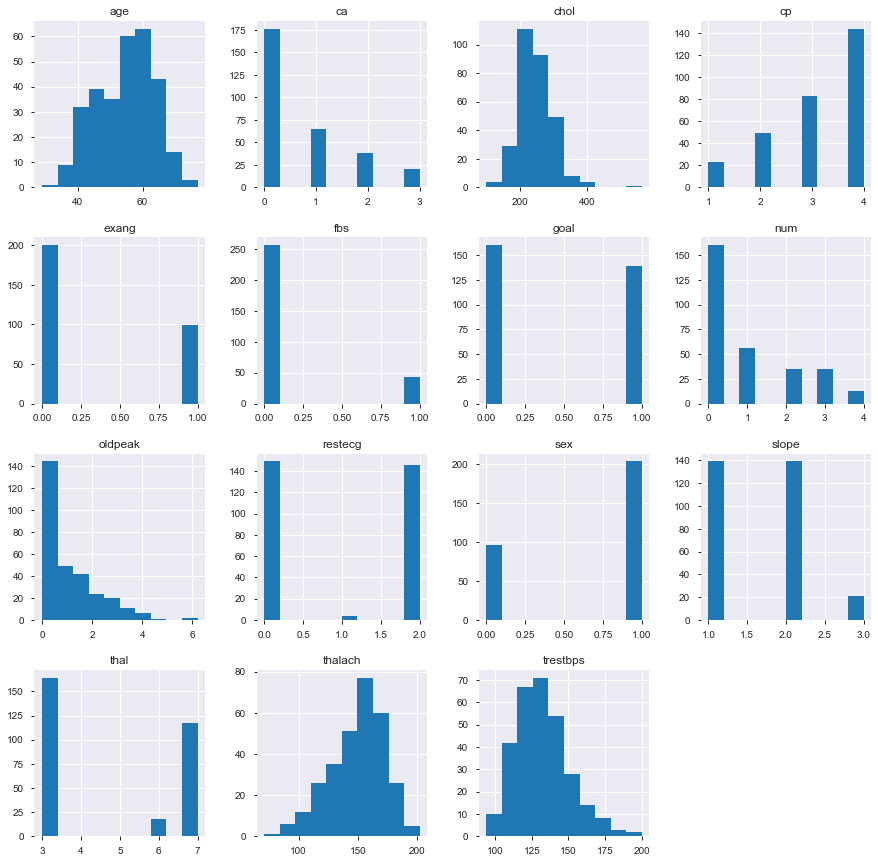

In [10]:

c = df.hist(figsize = (15,15))

Without cross validation!

In [11]:
y = df['goal']
X = df.drop(columns = ['num', 'goal'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [12]:
tf.keras.backend.set_floatx('float64')

In [13]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']

In [26]:
inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in X.keys()}
x = tf.stack(list(inputs.values()), axis=-1)

x = tf.keras.layers.Dense(10,activation='sigmoid')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_func = tf.keras.Model(inputs=inputs, outputs=output)

model_func.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])


In [27]:
train_set = tf.data.Dataset.from_tensor_slices((X_train.to_dict('list'), y_train.values)).batch(20)
test_set = tf.data.Dataset.from_tensor_slices((X_test.to_dict('list'), y_test.values)).batch(10)

In [28]:
model_func.fit(train_set, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 63ms/step - loss: 0.6863 - accuracy: 0.5350
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6758 - accuracy: 0.5350
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6683 - accuracy: 0.5350
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6629 - accuracy: 0.5350
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6609 - accuracy: 0.5350
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6588 - accuracy: 0.5350
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6569 - accuracy: 0.5350
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6555 - accuracy: 0.5350
Epoch 9/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.5500
Epoch 10/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6519 - accuracy: 0.6550
Epoch 11

Epoch 83/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5673 - accuracy: 0.7550
Epoch 84/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5664 - accuracy: 0.7550
Epoch 85/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5655 - accuracy: 0.7550
Epoch 86/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5646 - accuracy: 0.7550
Epoch 87/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5637 - accuracy: 0.7550
Epoch 88/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5628 - accuracy: 0.7550
Epoch 89/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5619 - accuracy: 0.7550
Epoch 90/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5610 - accuracy: 0.7550
Epoch 91/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5601 - accuracy: 0.7550
Epoch 92/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5592 - accuracy: 0.7550


In [29]:
model_func.evaluate(test_set)

10/10 [==============================] - 0s 16ms/step - loss: 0.5692 - accuracy: 0.7374


[0.5692138404316373, 0.7373737373737373]

In [31]:
X_train.index = range(len(X_train))
y_train.index = range(len(y_train))

With Cross Validation!

In [33]:
# MLP for Pima Indians Dataset with 10-fold cross validation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy as np 

def run_model(optimizer): 
    # fix random seed for reproducibility
    seed = 7
    np.random.seed(seed)
    # load pima indians dataset
    # define 10-fold cross validation test harness
    model = Sequential()
    model.add(Dense(10, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    cvscores = []
    for train, validation in kfold.split(X_train, y_train):
      # create model
        # Fit the model
        model.fit(np.array(X_train.loc[train]), np.array(y_train.loc[train]), epochs=150, batch_size=10, verbose=0)
        # evaluate the model
        scores = model.evaluate(np.array(X_train.loc[validation]), np.array(y_train.loc[validation]), verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    return model

def evaluate(model, X_test, y_test): 
    return model.evaluate(np.array(X_test), np.array(y_test))

In [34]:
model = run_model('adam')
evaluate(model, X_test, y_test)

accuracy: 80.49%
accuracy: 75.61%
accuracy: 80.00%
accuracy: 89.74%
accuracy: 89.74%
83.12% (+/- 5.67%)
99/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3633870579998451, 0.8383838383838383]

In [37]:
model = run_model('RMSprop')


accuracy: 70.73%
accuracy: 80.49%
accuracy: 80.00%
accuracy: 87.18%
accuracy: 89.74%
81.63% (+/- 6.62%)


In [38]:
evaluate(model,X_test, y_test)

99/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3965287398807987, 0.8484848484848485]

In [30]:
# My Randomized Search RF did better!